<a href="https://colab.research.google.com/github/incubate-hub/ic10/blob/main/LogisticRegressionForCodeAnomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
# Load the dataset
data = pd.read_csv("data.csv")
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,loCode numeric,loComment numeric,loBlank numeric,locCodeAndComment numeric,uniq_Op numeric,uniqOpnd numeric,total_Op numeric,total_Opnd numeric,branchCount numeric,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [44]:
data.iloc[:,-1]

0        False
1         True
2         True
3         True
4         True
         ...  
10880    False
10881    False
10882    False
10883    False
10884    False
Name:  defects, Length: 10885, dtype: bool

In [53]:
list(data.columns)

['loc',
 'v(g)',
 'ev(g)',
 'iv(g)',
 'n',
 'v',
 'l',
 'd',
 'i',
 'e',
 'b',
 't',
 'loCode numeric',
 'loComment numeric',
 'loBlank numeric',
 'locCodeAndComment numeric',
 'uniq_Op numeric',
 'uniqOpnd numeric',
 'total_Op numeric',
 ' total_Opnd numeric',
 ' branchCount numeric',
 ' defects']

In [51]:
data[" defects"]

0        False
1         True
2         True
3         True
4         True
         ...  
10880    False
10881    False
10882    False
10883    False
10884    False
Name:  defects, Length: 10885, dtype: bool

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loc                        10885 non-null  float64
 1   v(g)                       10885 non-null  float64
 2   ev(g)                      10885 non-null  float64
 3   iv(g)                      10885 non-null  float64
 4   n                          10885 non-null  float64
 5   v                          10885 non-null  float64
 6   l                          10885 non-null  float64
 7   d                          10885 non-null  float64
 8   i                          10885 non-null  float64
 9   e                          10885 non-null  float64
 10  b                          10885 non-null  float64
 11  t                          10885 non-null  float64
 12  loCode numeric             10885 non-null  int64  
 13  loComment numeric          10885 non-null  int

In [80]:
data = data.drop(['uniq_Op numeric', 'uniqOpnd numeric','total_Op numeric',' total_Opnd numeric', ' branchCount numeric'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loc                        10885 non-null  float64
 1   v(g)                       10885 non-null  float64
 2   ev(g)                      10885 non-null  float64
 3   iv(g)                      10885 non-null  float64
 4   n                          10885 non-null  float64
 5   v                          10885 non-null  float64
 6   l                          10885 non-null  float64
 7   d                          10885 non-null  float64
 8   i                          10885 non-null  float64
 9   e                          10885 non-null  float64
 10  b                          10885 non-null  float64
 11  t                          10885 non-null  float64
 12  loCode numeric             10885 non-null  int64  
 13  loComment numeric          10885 non-null  int

In [81]:
X = data.drop(' defects',axis=1)
y = data[" defects"]
X, y

(         loc  v(g)  ev(g)  iv(g)      n        v     l      d       i  \
 0        1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30   
 1        1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00   
 2       72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85   
 3      190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87   
 4       37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86   
 ...      ...   ...    ...    ...    ...      ...   ...    ...     ...   
 10880   18.0   4.0    1.0    4.0   52.0   241.48  0.14   7.33   32.93   
 10881    9.0   2.0    1.0    2.0   30.0   129.66  0.12   8.25   15.72   
 10882   42.0   4.0    1.0    2.0  103.0   519.57  0.04  26.40   19.68   
 10883   10.0   1.0    1.0    1.0   36.0   147.15  0.12   8.44   17.44   
 10884   19.0   3.0    1.0    1.0   58.0   272.63  0.09  11.57   23.56   
 
               e     b        t  loCode numeric  loComment numeric  \
 0          1.30  1.30     1.30         

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(' defects', axis=1), data[' defects'], test_size=0.2)


In [83]:
# Normalize the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
predictions = model.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.83      0.98      0.90      1779
        True       0.52      0.11      0.18       398

    accuracy                           0.82      2177
   macro avg       0.67      0.54      0.54      2177
weighted avg       0.77      0.82      0.77      2177



In [91]:
# Get the input from the user to make predictions
input_data = []
for feature in data.columns[:-1]:
    value = input(f"Enter the value of {feature}: ")
    input_data.append(float(value))
input_data = scaler.transform([input_data])

# Make predictions on the input data
prediction = model.predict(input_data)[0]
if prediction == 0:
    print("There is no anomaly")
else:
    print("There is anomaly.")

Enter the value of loc: 1.1
Enter the value of v(g): 1.4
Enter the value of ev(g): 1.4
Enter the value of iv(g): 1.4
Enter the value of n: 1.3
Enter the value of v: 1.3
Enter the value of l: 1.3
Enter the value of d: 1.3
Enter the value of i: 1.3
Enter the value of e: 1.3
Enter the value of b: 1.3
Enter the value of t: 1.3
Enter the value of loCode numeric: 2
Enter the value of loComment numeric: 2
Enter the value of loBlank numeric: 2
Enter the value of locCodeAndComment numeric: 2
The model predicts that the output is False.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 81.85576481396417 %


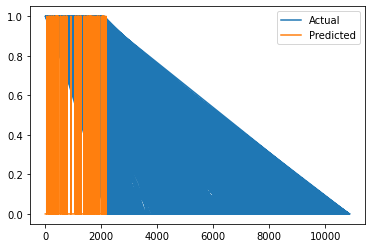

In [92]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score and percentage
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print('Accuracy:', accuracy_percentage, '%')

# Plot the accuracy score
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [93]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

# Evaluate the model accuracy on the test set
accuracy = model.score(X_test_normalized, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8171796049609554


In [95]:
import pickle 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score and percentage
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print( accuracy_percentage)
pickle.dump(model, open('anomaly_model.sav','wb'))


81.85576481396417


In [132]:
import pickle

# Load the model from the .sav file
with open('/content/anomaly_model.sav', 'rb') as f:
    model = pickle.load(f)

In [134]:
def prediction_model(loc,v,ev,iv,n,v1,l,d,i,e,b,t,loCode_numeric,loComment_numeric,loBlank_numeric,locCodeAndComment_numeric):
  input_data = [loc,v,ev,iv,n,v1,l,d,i,e,b,t,loCode_numeric,loComment_numeric,loBlank_numeric,locCodeAndComment_numeric]
  input_data = scaler.transform([input_data])  
  prediction = model.predict(input_data)[0]
  if prediction == 0:
      print("There is no anomaly")
  else:
      print("There is anomaly.")

In [135]:
prediction_model(1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,2,2,2,2)

There is no anomaly
